In [16]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pywt
import scipy as sp

plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# Fourier and Wavelet Transforms notes from Brunton & Kutz, 2022

*Paraphrased from the Textbook*:

A central concern of mathematical physics and engineering mathematics involves the transformation of equations into a coordinate system where expressions simplify, decouple and are amenable to computation and analysis. Perhaps the most foundational and ubiquitous coordinate transformation was introduced by Fourier in the early 1800s to investigate the theory of heat.

Fourier introduced the concept that sine and cosine functions of increasing frequency provide an orthogonal basis for the space of solution functions. Indeed, the ***Fourier transform*** basis of sines and cosines are eigenfunctions of the heat equation, with the specific frequencies serving as the eigenvalues, determined by the geometry, and amplitudes determined by the boundary conditions.

The ***fast Fourier transform*** has become the cornerstone of computational mathematics, enabling real-time image and audio compression, global communication networks, modern devices and hardware, numerical physics and engineering at scale and advanced data analysis.

With increasingly complex problems, data sets and computational geometries, simple Fourier sine and cosine bases have given way to *tailored* bases, such as the data-driven SVD. In addition, related functions, called ***wavelets***, have been developed for advanced signal processing and compression efforts.

## Fourier Series and Fourier Transforms

So we looked through SVDs last time. With the SVD, we first used our data matrix $A$ to compute the correlation matrices $A^{T}A$ and $AA^{T}$. $A^{T}A$ is the correlation matrix of A and $AA^{T}$ was the row-wise correlation matrix of A. Why does that matter? Well imagine that the rows are ordered by time and the columns are spatial variables. You want to "decouple" the time components away from the spatial components. After we computed our correlation matrices, we found an eigenbasis and set of eigenvalues for both $A^{T}A$ and $AA^{T}$, along with the eigenvalues that accompany each basis vector.

Luckily for us, it turns that ${A^{T}A$ and $AA^{T}$ have the same eigenvalues, so we only have to worry about the different eigenbases for the column-wise and row-wise correlation matrices.

Eigenbases don't necessarily have to be sets of list-like vectors, but can instead be eigenfunctions. Fourier series are a prime example of exactly this, so let's take a look at that.

Fourier methods rely on the notion of a *Hilbert space*, which is essentially a generalization of the familiar vector space concept to include functions with infinitely many degrees of freedom.

You don't have to intimately understand the idea of induced norms and function spaces to get the basic idea. In the prior SVD case, we are concerned with coordinate systems defined by a basis of orthogonal vectors from $R^{N}$ or $C^{N}$. In this case, we are going to be concerned with coordinate systems defined by a basis of orthogonal functions (which are also vectors).

Just like we were interested in projecting vectors into a new coordinate system with SVD, we are going to be interested in projecting functions into a new coordinate system with Fourier methods. A *Fourier Series* representation of a function is its projection onto the orthogonal set of sine and cosine functions with integer period on the domain $[a, b]$.

### Fourier Series and Fourier Transforms Notes

<p align="center">
    <img src="images\Fourier2_-_restoration1.jpg" caption="Rare">
</p>
<p align = "center">
    <figcaption align = "center"> Fig.1 - Rare Picture Of European Man Smiling </figcaption>
</p>

If $f(x)$ is periodic and piecewise smooth, then it can be written in terms of a Fourier series, which is an infinite sum of cosines and sines of increasing frequency. In particular, if $f(x)$ is $2\pi$-periodic, it may be written as

$$ f(x) = \frac{a_{0}}{2} + \sum_{k=1}^{\infty}(a_{k}cos(kx) + b_{k}sin(kx)). $$

The coefficients $a_{k}$ and $b_{k}$ are the coordinates obtained by projecting f onto the orthogonal cosine and sine basis $\{cos(kx),sin(kx)\}_{0}^{\infty}$:

\begin{aligned}
a_{k} = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)cos(kx)dx \\
b_{k} = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)sin(kx)dx
\end{aligned}

In other words, the integrals may be rewritten in terms of the inner product as

\begin{aligned}
    a_{k} = \frac{1}{||cos(kx)||^{2}} \langle f(x),cos(kx) \rangle, \\
    b_{k} = \frac{1}{||sin(kx)||^{2}} \langle f(x),sin(kx) \rangle,
\end{aligned}

where $||cos(kx)||^{2} = ||sin(kx)||^{2} = \pi$. The factor of $\frac{1}{\pi}$ can be verified by numerically integrating $cos(x)^{2}$ and $sin(x)^{2}$ from $-\pi$ to $\pi$.

We can generalize this to a Fourier series of an L-periodic function on $[0,L)$ with

\begin{aligned}
f(x) = \frac{a_{0}}{2} + \sum_{k=1}^{\infty}(a_{k}cos(\frac{2\pi kx}{L}) + b_{k}sin(\frac{2\pi kx}{L})), \\
a_{k} = \frac{2}{L}\int_{0}^{L}f(x)cos(\frac{2\pi kx}{L})dx \\
b_{k} = \frac{2}{L}\int_{0}^{L}f(x)sin(\frac{2\pi kx}{L})dx
\end{aligned}

We can simplify this representation using Euler's formula $e^{ikx} = cos(kx) + isin(kx)$ to write a Fourier series in complex form with complex coefficients $c_{k} = \alpha_{k} + i\beta_{k}$:

\begin{aligned}
f(x) = \sum_{k = -\infty}^{\infty}(\alpha_{k} + i\beta_{k})(cos(kx) + isin(kx)) \\
= (\alpha_{0} + i\beta_{0}) + \sum_{k = 1}^{\infty}[(\alpha_{-k} + \alpha_{k})cos(kx)+(\beta_{-k} + \beta_{k})sin(kx)] \\
+ i\sum_{k=1}^{\infty}[(\beta_{-k} + \beta_{k})cos(kx)-(\alpha_{-k}-\alpha_{k})sin(kx)]
\end{aligned}.

If $f(x)$ is real-valued, then $\alpha_{-k} = \alpha_{k}$ and $\beta_{-k} = -\beta_{k}$, so that $c_{-k} = \overline{c}_{k}$.

Thus, the functions $\psi = e^{ikx}$ for $k \in \mathbb{Z}$ provide a basis for periodic, complex-valued functions on an interval $[0, 2\pi)$.

We can see that these functions are orthogonal:

$\langle \psi_{j},\psi_{k} \rangle = \int_{-\pi}^{\pi}e^{ijx}e^{-ikx}dx = \int_{-\pi}^{pi}e^{i(j-k)x}dx = \left[\frac{e^{i(j-k)x}}{i(j-k)}\right]_{-\pi}^{\pi} = \left
                            \begin{cases}
                                0 \quad &\text{if} \, j \neq k \\
                                2\pi \quad &\text{if} \, j = k
                            \end{cases}
                          \right.$

So $\langle \psi_{j}, \psi{k} \rangle = 2\pi \delta_{jk}$, where $\delta$ is the Kronecker delta function. Similarly, the functions $e^{i2\pi kx / L}$ provide a basis for $L^{2}([0,L))$, the space of square integrable functions defined on $x \in [0,L)$.

As mentioned earlier, a Fourier series is just a change of coordinates of a function $f(x)$ into an infinite-dimensional orthogonal function space spanned by sines and cosines
(i.e., $\psi_{k} = e^{ikx} = cos(kx) + isin(kx))$:

$f(x) = \sum_{-\infty}^{\infty}c_{k}\psi_{k}(x) = \frac{1}{2\pi}\sum_{-\infty}^{\infty}\langle f(x),\psi_{k}(x) \rangle \psi_{k}(x)$.

The coefficients are given by $c_{k} = \frac{1}{2\pi} \langle f(x), \psi_{k}(x) \rangle$. The factor of $\frac{1}{2\pi}$ normalizes the projection by the square of the norm of $\psi_{k}$.

[]

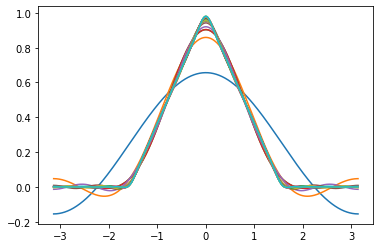

In [3]:
# Define domain

dx = 0.001
L = np.pi
x = L * np.arange(-1+dx, 1+dx, dx)
n = len(x)
nquart = int(np.floor(n/4))

# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

# Compute Fourier series
A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2

A = np.zeros(20)
B = np.zeros(20)
for k in range(20):
    A[k] = np.sum(f * np.cos(np.pi * (k+1) * x/L)) * dx  # Inner Product
    B[k] = np.sum(f * np.sin(np.pi * (k+1) * x/L)) * dx
    fFS = fFS + A[k] * np.cos((k+1)*np.pi*x/L)  +B[k]*np.sin((k+1)*np.pi*x/L)
    plt.plot(x, fFS, '-')

plt.plot()


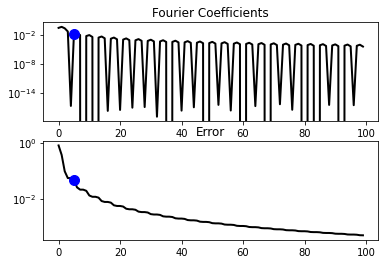

In [4]:
# Plot amplitudes

fFS = (A0/2) * np.ones_like(f)
kmax = 100
A = np.zeros(kmax)
B = np.zeros(kmax)
ERR = np.zeros(kmax)

A[0] = A0/2
ERR[0] = np.linalg.norm(f-fFS)/np.linalg.norm(f)

for k in range(1,kmax):
    A[k] = np.sum(f*np.cos(np.pi*k*x/L)) * dx
    B[k] = np.sum(f*np.sin(np.pi*k*x/L)) * dx
    fFS = fFS + A[k] * np.cos(k*np.pi*x/L) + B[k] * np.sin(k*np.pi*x/L)
    ERR[k] = np.linalg.norm(f-fFS)/np.linalg.norm(f)

thresh = np.median(ERR) * np.sqrt(kmax) * (4/np.sqrt(3))
r = np.max(np.where(ERR > thresh))

fig, axs = plt.subplots(2,1)
axs[0].semilogy(np.arange(kmax),A,color='k',linewidth=2)
axs[0].semilogy(r,A[r],'o',color='b',markersize=10)
plt.sca(axs[0])
plt.title("Fourier Coefficients")

axs[1].semilogy(np.arange(kmax),ERR,color='k',linewidth=2)
axs[1].semilogy(r,ERR[r],'o',color='b',markersize=10)
plt.sca(axs[1])
plt.title("Error")

plt.show()

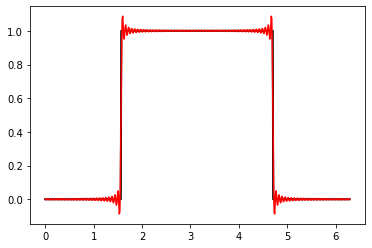

In [7]:
# Gibbs

dx = 0.01
L = 2*np.pi
x = np.arange(0,L+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

f = np.zeros_like(x)
f[nquart:3*nquart] = 1

A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFS = A0/2 * np.ones_like(f)

for k in range(1,100):
    A[k] = np.sum(f * np.cos(2*np.pi*k*x/L)) * dx * 2 / L
    B[k] = np.sum(f * np.sin(2*np.pi*k*x/L)) * dx * 2 / L
    fFS = fFS + A[k]*np.cos(2*k*np.pi*x/L) + B[k]*np.sin(2*k*np.pi*x/L)

plt.plot(x,f,color='k',linewidth=2)
plt.plot(x, fFS,'-',color='r',linewidth=1.5)
plt.show()

#### Fourier Transform

While the Fourier series is defined for periodic functions, the Fourier transform integral is essentially the limit of a Fourier series as the length of the domain goes to infinity, which allows us to define a funciton defined on $(-\infty, \infty)$ without repeating.

On the domain $x \in [-L,L)$, the Fourier series is
$ f(x) = \sum_{-\infty}^{\infty} c_{k}e^{ik\pi x/L} $

with the coefficients given by

$c_{k} = \frac{1}{2L} \langle f(x), \psi_{k} \rangle = \frac{1}{2L}\int_{-L}^{L}f(x)e^{-ik\pi x/L}dx$.

Restating the previous results, f(x) is now represented by a sum of sines and cosines with a discrete set of frequencies given by $\omega_{k} = k\pi / L$. Taking the limit as $L\to\infty$, these discrete frequencies become a continuous range of frequencies. Define $\omega = k\pi /L$, $\Delta \omega = \pi / L$ and take the limit $L\to\infty$, so that $\Delta \omega\to 0$:

$f(x) = \[\lim_{\Delta \omega \to 0} \] \sum_{k=-\infty}^{\infty}\frac{\Delta\omega}{2\pi}\int_{-\pi / \Delta\omega}^{\pi / \Delta\omega} f(\xi)e^{ik\Delta\omega\xi}d\xi  \ e^{ik\Delta\omega}$

When we take the limit, the integrand expression will become the Fourier transform of $f(x)$, denoted by $\hat{f}(\omega) \triangleq \mathcal{F}(f(x))$. In addition, the sumation with weight $\Delta\omega$ becomes a Riemann integral, resulting in the following:

\begin{aligned}
\hat{f}(\omega) = \mathcal{F}(f(x)) = \int_{-\infty}{\infty}f(x)e^{-i\omega x} dx \\
f(x) = \mathcal{F}^{-1}(\hat{f}(\omega)) = \frac{1}{2\pi}\int_{-\infty}^{\infty}\hat{f}(\omega)e^{i\omega x} d\omega
\end{aligned}.

These two integrals are known as the ***Fourier transform pair***. Both integrals converge as long as $\int_{-\infty}^{\infty}|f(x)|dx \lt \infty$ and $\int_{-\infty}^{\infty}|\hat{f}(\omega)|d\omega \lt \infty$.

The Fourier transform has a number of properties, including linearity and the behavior of derivatives functions in the Fourier transform domain.

##### Fourier transforms of derivatives of functions

The fourier transform of the derivative of a funciton is given by

\begin{aligned}
\mathcal{F} \left( \frac{d}{dx}f(x) \right ) = \int_{-\infty}^{\infty} \overbrace{f'(x)}^{dv} \overbrace{e^{-i\omega x}}^{u} dx \\
= \left [ \underbrace{f(x)e^{-i\omega x}}_{uv} \right ]_{-\infty}^{\infty} - \int_{-\infty}^{\infty}\underbrace{f(x)}_{v} \left [ \underbrace{-i\omega e^{-i\omega x}}_{du} \right ] dx \\
= i\omega \int_{-\infty}^{\infty} f(x)e^{-i\omega x} dx \\
= i\omega \mathcal{F}(f(x)).
\end{aligned}

The formula for the Fourier transform of a higher derivative is given by

$$\mathcal{F} \left (\frac{d^{n}}{dx^{n}} f(x) \right ) = i^{n}\omega^{n} \mathcal{F}(f(x)).$$

##### Linearity of Fourier Transform

The Fourier transform is a linear operator, so that

$$\mathcal{F}(\alpha \hat{f}(\omega) + \beta \hat{g}(\omega)) = \alpha\mathcal{F}^{-1}(\hat{f}) + \beta\mathcal{F}(\hat{g})$$

and

$$\mathcal{F}^{-1}(\alpha \hat{f}(\omega) + \beta\hat{g}(\omega)) = \alpha\mathcal{F}^{-1}(\hat{f}) + \beta\mathcal{F}^{-1}(\hat{g})$$

##### Parseval's Theorem

The Fourier transform preserves the $L_{2}$-norm, up to a constant. This is closely related to unitarity, so that two functions will retain the same inner product before and after the Fourier transform. This property is useful for approximation and truncation, providing the ability to bound error at a given truncation.

$$\int_{-\infty}^{\infty}|\hat{f}(\omega)|^{2} d\omega = 2\pi \int_{-\infty}^{\infty}|f(x)|^{2}dx.$$


##### Convolution

The convolution of two functions is very well-behaved in the Fourier domain, being the product of the two Fourier-transformed functions.

We define the convolution of two functions $f(x)$ and $g(x)$ as $f \ast g$:

$$(f \ast g)(x)=\int_{-\infty}^{\infty}f(x-\xi)g(\xi)d\xi.$$

If we let $\hat{f} = \mathcal{F}(f)$ and $\hat{g} = \mathcal{F}(g)$, then

\begin{aligned}
\mathcal{F}^{-1}(\hat{f}\hat{g})(x)=\frac{1}{2\pi}\int_{-\infty}^{\infty}\hat{f}(\omega)\hat{g}(\omega)e^{i\omega x}d\omega \\
=\int_{-\infty}^{\infty}\hat{f}(\omega)e^{i\omega x} \left (\frac{1}{2\pi}\int_{-\infty}^{\infty}g(y)e^{-i\omega y}dy \right )d\omega \\
=\frac{1}{2\pi}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}g(y)\hat{f}(\omega)e^{i\omega(x-y)}d\omega dy \\
=\int_{-\infty}^{\infty}g(y) \left (\underbrace{\frac{1}{2\pi}\int_{-\infty}^{\infty}\hat{f}(\omega)e^{i\omega(x-y)}d\omega}_{f(x-y)} \right ) dy \\
=\int_{-\infty}^{\infty}g(y)f(x-y)dy = g \ast f = f \ast g.
\end{aligned}

Thus, multiplying functions in the frequency domain is the same as convolving functions in the spatial domain.

#### Discrete Fourier Transform

Until now, we have considered the Fourier series and Fourier transform for continuous functions $f(x)$. However, when computing or working with real data, it is necessary to approximate the Fourier transform on discrete vectors of data. The resulting discrete Dourier transfort (DFT) is essentially a discretized version of the Fourier series for vectors of data $\bold{f} = [f_{1} \ f_{2} \ f_{3} \ ... \ f_{n}]^{T}$ obtained by discretizing the function $f(x)$ at a regular spacing, denoted $\Delta x$.

Though the DFT is tremendously useful for numerical approximation and computation, it does not scale well to very large $n \gg 1$, as the simple formulation involves multiplication by a dense n x n matrix, requiring $\mathcal{O}(n^{2})$ operations.

In 1965, James W. Cooley and John W. Tukey developed the fast Fourier transform (FFT) algorithm [technically originally created by Gauss in 1805] that scales as $\mathcal{O}(n \ log(n))$. As n becomes very large, the log(n) component grows slowly, and the algorithm approaches a linear scaling. Their algorithm was based on a fractal symmetry in the Fourier transform that allows an n-dimensional DFT to be solved with a number of lower-dimensional DFT computations.

Although we will always use the FFT for computations, it is illustrative to begin with the simplest formulation of the DFT. The discrete Fourier transform is given by

$$\hat{f}_{k} = \sum_{j=0}^{n-1}f_{j}e^{-i2\pi jk/n},$$

and the inverse discrete Fourier transform (iDFT) is given by

$$f_{k} = \frac{1}{n}\sum_{j=0}^{n-1}\hat{f}_{j}e^{i2\pi jk/n}.$$

Thus, the DFT is a linear operator (i.e., a matrix) that maps the data points in $\bold{f}$ to the frequency domain $\bold{\hat{f}}$:

$$\{f_{1},f_{2},...,f_{n}\} \overset{DFT}{\implies} \{\hat{f_{1}},\hat{f_{2}},...,\hat{f_{n}\}$$

For a given number of points n, the DFT represents the data using sine and cosine functions with integer multiples of a fundamental frequency, $\omega_{n} = e^{-2\pi i/n}$. The DFT may be computed by left-multiplying $\bold{f}$ by the following Vandermonde matrix:

$$
\[
  \left[ {\begin{array}{ccccc}
    1 & 1 & 1 & \cdots & 1\\
    1 & \omega_{n} & \omega_{n}^{2} & \cdots & \omega_{n}^{n-1} \\
    1 & \omega_{n}^{2} & \omega_{n}^{4} & \cdots & \omega_{n}^{2(n-1)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots\\
    1 & \omega_{n}^{n-1} & \omega_{n}^{2(n-1)} & \cdots & \omega_{n}^{(n-1)^{2}}\\
  \end{array} } \right]
\]
$$

The output vector $\bold{\hat{f}}$ contains the Fourier coefficients for the input vector $\bold{f}$, and the DFT matrix $\bold{F}$ is a unitary Vandermonde matrix. The matrix $\bold{F}$ is complex-valued, so the output $\bold{\hat{f}}$ has both a magnitude and a phase.

The code below generates the discrete Fourier transform matrix in three different ways.


C:\Users\kthompson395\AppData\Local\Temp\ipykernel_10880\890796951.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  F[i, k] = w**(i*k)


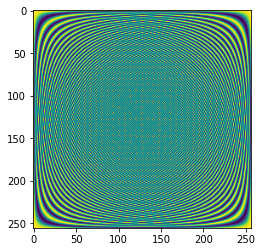

In [3]:
# Generate discrete Fourier transform matrix
n = 256
w = np.exp(-1j * 2 * np.pi / n)
F = np.zeros((n,n))

# Slow
for i in range(n):
    for k in range(n):
        F[i, k] = w**(i*k)

F = np.real(F)
plt.imshow(F)
plt.show()

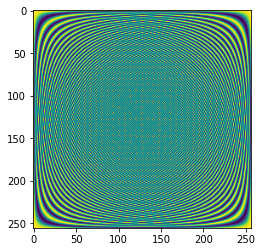

In [4]:
# Fast
J, K = np.meshgrid(np.arange(n), np.arange(n))
F = np.power(w,J*K)
F = np.real(F)
plt.imshow(F)
plt.show()

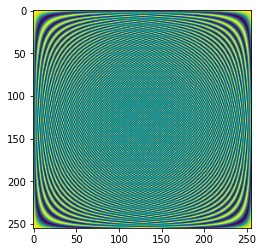

In [5]:
# Kevin's Alternative
w = np.power(w, np.arange(0,n-1,1))
F = np.vander(w,n, increasing=True)
F = np.real(F)
plt.imshow(F)
plt.show()

#### Fast Fourier Transform

Multiplying by the DFT matrix $F$ involves $\mathcal{O}(n^{2})$ operations. Thankfully, the fast Fourier transform comes to the rescue, but there isn't just one implementation of the FFT, but several. Let's investigate some right here, right now. This is going to include material outside of the Brunton and Kutz book, but I believe it is worth investigating.

##### Some Preliminaries

Let's first get a couple of definitions out of the way. A number is a composite number if it is a positive integer that can be formed by multiplying two smaller positive integers. Every positive integer is composite, prime or the unit 1. If a number is prime, then its only divisors are itself and 1. One of the core theorems of mathematics is the ***Fundamental Theorem of Arithmetic***, which asserts that every positive integer may be factored into a product of prime numbers.

For example, the last expression on each of the following lines is a prime factorization of 27, 51 and 8, respectively:

\begin{aligned}
27 = 3 \times 9 = 3 \times 3 \times 3 \\
51 = 3 \times 17 \\
8 = 2 \times 2 \times 2 \\
\end{aligned}

When we say that an integer number is ***n-smooth***, we mean that its prime factors are all less-then-or-equal-to n. So 27 is 3-smooth, 29-smooth, 2908392013902-smooth, and so on, but it isn't 2-smooth. 51 is 17-smooth, but it isn't 3-smooth. 8 is 2-smooth.

Intuitively, you can think of the value of n in the n-smoothness of a number as being inversely related to how "smooth" a number is. For example, 8 is smoother than 51. Think of the factors in the prime factorization as grains of sand. If the grains of sand become so big that they are pebbles or boulders, then we wouldn't think of the "sand" as smooth.

The reason we care about n-smoothness here is that FFT algorithms recursively break down the DFT problem of a given size N into problems the size of its factors. The "smoother" N is, the smaller the each individual sub-problem will be and if the base cases of the recursion are small enough primes, efficient FFT algorithms exist. If we are stuck with large prime sizes, then we have to use less efficient algorithms, which we will get to later.

Below is some code for obtaining the prime factorization of a number and determining if it is n-smooth:

In [49]:
from primesieve.numpy import primes

def get_prime_factorization(integer: int) -> np.ndarray:
    end = np.ceil(np.sqrt(integer))
    factorization = list()
    prime_array = primes(end)
    new_int = integer
    for p in prime_array:
        if new_int % p == 0:
            while new_int % p == 0:
                factorization.append(p)
                new_int /= p
    return factorization

def is_n_smooth(integer: int, n: int) -> bool:
    factorization = get_prime_factorization(integer)
    if factorization:
        return True if max(factorization) <= n else False
    else:
        return False

##### Twiddle Factors

A twiddle factor is another key concept that we need to understand for Fast-Fourier transform algorithms.

First, let's talk about what a ***root of unity*** is.

An nth root of unity is a number $z$ satisfying the equation

$$ z^{n} = 1$$.

The roots of unity are usually taken to be complex numbers. In such a case, we can find the nth roots of unity by computing

$$exp \left ( i2\pi k/N \right ) = cos \left ( \frac{2\pi k}{N} \right ) + i \ sin \left ( \frac{2\pi k}{N} \right), \ k = 0,1,...,n-1$$

$$w_{N}^{k} = e^{-i2\pi k/N} = cos \left ( \frac{2\pi k}{N} \right ) - i \ sin \left ( \frac{2\pi k}{N} \right)$$

##### Cooley-Tukey FFT Algorithm

The Cooley-Tukey family of algorithms are the most common FFT algorithms. It expresses the DFT of an arbitrary composite size $N = N_{1}N_{2}$ in terms of $N_{1}$ smaller DFTs of sizes $N_{2}$, recursively, to reduce the computation time to $\mathcal{O}(n \ log(n))$ for highly composite $N$.

Cooley-Tukey algorithms recursively re-express a DFT of a composite size $N = N_{1}N_{2}$ as:

1) Perform $N_{1}$ DFTs of size $N_{2}$
2) Multiply by twiddle factors (we'll get to those in a bit)
3) Perform $N_{2}$ DFTs of size $N_{1}$

Typically, either $N_{1}$ or $N_{2}$ is a small integer factor, called the ***radix***, which can differ between stages of the recursion. If $N_{1}$ is the radix, the algorithm is called a ***decimation in time*** (DIT) algorithm. If the $N_{2}$ is the radix, the algorithm is called a ***decimation in frequency*** (DIF) algorithm.

To be continued...

In [7]:
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t))

In [8]:
n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

In [9]:
indices = PSD > 100
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

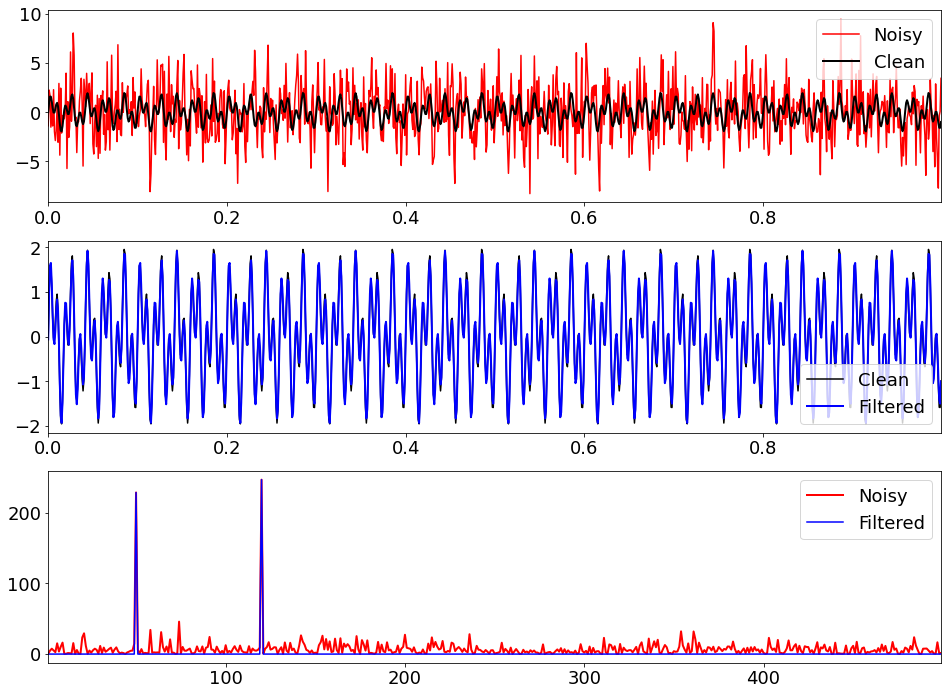

In [12]:
## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,f_clean,color='k',linewidth=1.5,label='Clean')
plt.plot(t,ffilt,color='b',linewidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',linewidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

##### Spectral Derivatives

In [13]:
# Check original code. Something isn't right here.
n = 128
L = 30
dx = L/n
x = np.arange(-L/2,L/2,dx,dtype='complex_')
f = np.cos(x) * np.exp(-np.power(x,2)/25) # Function
df = -(np.sin(x) * np.exp(-np.power(x,2)/25) + (2/25)*x*f) # Derivative

## Approximate derivative using finite difference
dfFD = np.zeros(len(df),dtype='complex_')
for kappa in range(len(df)-1):
    dfFD[kappa] = (f[kappa+1]-f[kappa])/dx

dfFD[-1] = dfFD[-2]

fhat = np.fft.fft(f)
kappa = (2*np.pi/L)*np.arange(-n/2,n/2)
kappa = np.fft.fftshift(kappa)
dfhat = kappa * fhat * (1j)
dfFFt = np.real(np.fft.ifft(dfhat))

C:\Users\kthompson395\.conda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


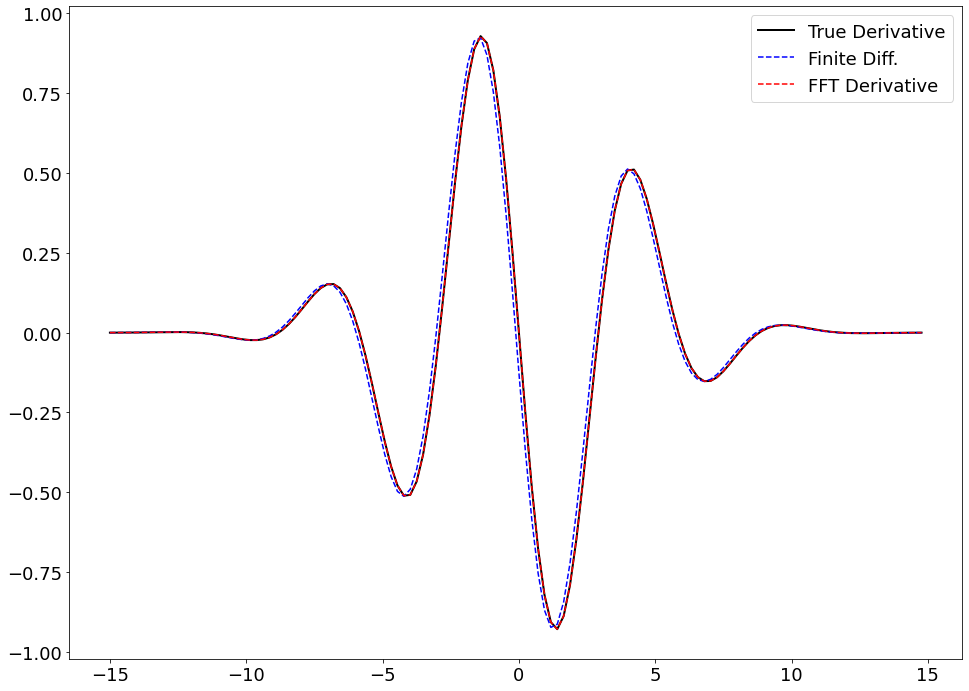

In [15]:
## Plots
plt.plot(x,df.real,color='k',linewidth=2,label='True Derivative')
plt.plot(x,dfFD.real,'--',color='b',linewidth=1.5,label='Finite Diff.')
plt.plot(x,dfFFt.real,'--',color='r',linewidth=1.5,label='FFT Derivative')
plt.legend()
plt.show()

#### Transforming Differential Equations

##### Heat Equation

In one spatial dimension, the heat equation is given by

$$ u_{t} = \alpha^{2}u_{xx},$$

where $u(t,x)$ is the temperature distribution in time and space. If we Fourier-transform in space, then $\mathcal{F}(u(t,x)) = \hat{u}(t,\omega)$. The PDE above becomes

$$ \hat{u}_{t} = -\alpha^{2}\omega^{2}\hat{u}, $$

since the two spatial derivatives contribute $(i\omega)^{2} = -\omega^{2}$ in the Fourier transform domain. Thus, by taking the Fourier transform, the original PDE becomes an ODE for each fixed frequency $\omega$. The solution is given by

$$\hat{u}(t,\omega)=e^{-\alpha^{2}\omega^{2}t}\hat{u}(0,\omega).$$



### Two Dimensional Transforms

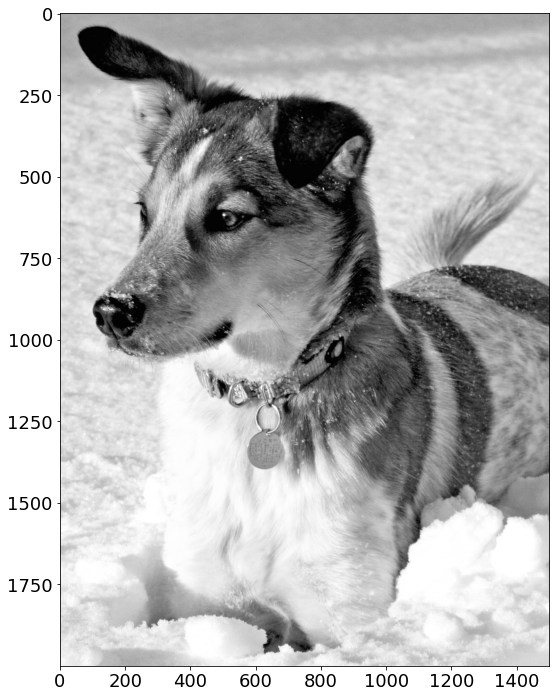

In [40]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

dog = imread(os.path.join("data", "dog.jpg"))
gray = rgb2gray(dog)
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

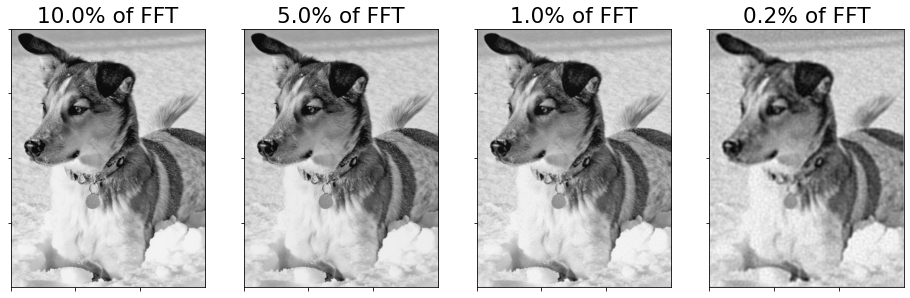

In [41]:
Bt = np.fft.fft2(gray)
Btsort = np.sort(np.abs(Bt.reshape(-1)))  # sort by magnitude

fig, axs = plt.subplots(1,4)
count = 0
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt) > thresh
    Atlow = Bt * ind
    Alow = np.fft.ifft2(Atlow).real
    axs[count].imshow(Alow,cmap='gray')
    axs[count].set_title(str(keep*100)+"% of FFT")
    axs[count].set_yticklabels([])
    axs[count].set_xticklabels([])
    count += 1
plt.show()

In [42]:
n = 2
w = 'db1'
coeffs = pywt.wavedec2(gray, wavelet=w, level=n)

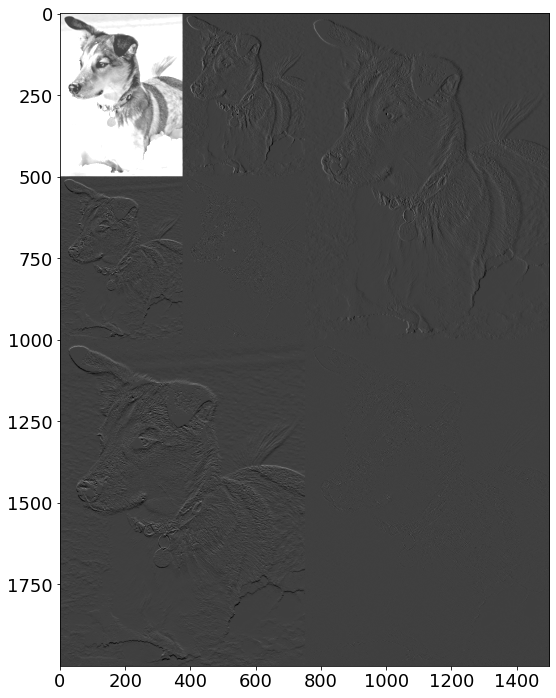

In [43]:
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in
                                coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)
plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.show()



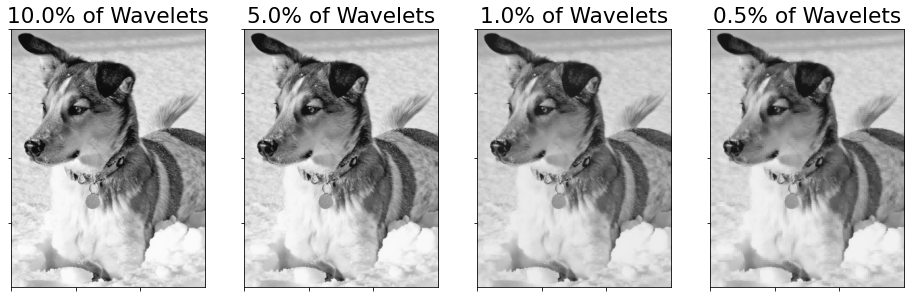

In [44]:
n = 4
w = 'db1'
coeffs = pywt.wavedec2(gray, wavelet=w, level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

fig, axs = plt.subplots(1,4)
count = 0
for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind
    coeffs_filt = pywt.array_to_coeffs(Cfilt, coeff_slices, output_format='wavedec2')
    Arecon = pywt.waverec2(coeffs_filt, wavelet=w)
    axs[count].imshow(Arecon,cmap='gray')
    axs[count].set_title(str(keep*100)+"% of Wavelets")
    axs[count].set_yticklabels([])
    axs[count].set_xticklabels([])
    count += 1
plt.show()